# Proyek Analisis Data: [Air-quality-dataset]
- **Nama:** Mohammad Nurdin Prastya Hermansah
- **Email:** mohammadnurdin2001@gmail.com
- **ID Dicoding:** 2001nurdin

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kota mana yang memiliki kualitas udara terbaik dan terburuk berdasarkan data yang tersedia?
- Pertanyaan 2 : Polutan apa yang paling dominan di kota Changping dan Dongling?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## Data Wrangling

### Gathering Data

In [3]:
Data_Changping_df = pd.read_csv("https://raw.githubusercontent.com/MohPras/Air-Quality-Dataset-/refs/heads/main/PRSA_Data_Changping_20130301-20170228.csv")
Data_Changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [4]:
Data_Dingling_df = pd.read_csv("https://raw.githubusercontent.com/MohPras/Air-Quality-Dataset-/refs/heads/main/PRSA_Data_Dingling_20130301-20170228.csv")
Data_Dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


### Assessing Data

### Menilai data changping

In [5]:
# cek tipe data
Data_Changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
# cek missing value
Data_Changping_df.isna() .sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Kesimpulan
- Ada mising value pada data

In [7]:
# Cek duplikasi data
print("Kesimpulan duplikasi data ada: ", Data_Changping_df.duplicated() .sum())

Kesimpulan duplikasi data ada:  0


In [8]:
# Cek statistik data
Data_Changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Menilai Data Dingling

In [9]:
# cek tipe data
Data_Dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [10]:
# cek missing data
Data_Dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Kesimpulan
- Ada missing value pada data

In [11]:
# cek duplikasi data
print("Kesimpulan pada data ini duplikasi data ada: ", Data_Dingling_df.duplicated().sum())

Kesimpulan pada data ini duplikasi data ada:  0


In [12]:
# Cek statistik Data
Data_Dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Cleaning Data

### Cleaning data Changping

#### Fix missing value

In [13]:
# cek missing value
Data_Changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Untuk menangai data yang hilang saya menggunakan metode imputation dimana saya akan mengisi data yang hilang dengan data di depan dan dibelakang.



In [14]:
Data_Changping_df = Data_Changping_df.fillna(method='ffill')  # Forward Fill (isi dengan nilai sebelumnya)
Data_Changping_df = Data_Changping_df.fillna(method='bfill')  # Backward Fill (isi dengan nilai setelahnya)

/var/folders/j2/qkfj_xy51b32c3l9kwp2d28w0000gn/T/ipykernel_12411/3855253005.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_Changping_df = Data_Changping_df.fillna(method='ffill')  # Forward Fill (isi dengan nilai sebelumnya)
/var/folders/j2/qkfj_xy51b32c3l9kwp2d28w0000gn/T/ipykernel_12411/3855253005.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_Changping_df = Data_Changping_df.fillna(method='bfill')  # Backward Fill (isi dengan nilai setelahnya)


In [15]:
Data_Changping_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Kesimpulan
- Data sudah bersih dari missing value

### Cleaning data Dongling

In [16]:
# cek mising value
Data_Dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Untuk menangani miising value pada data ini saya menggunakan imputation, data kosong akan diganti dengan data di depanya dan dibelakangnya.

In [17]:
Data_Dingling_df = Data_Dingling_df.fillna(method='ffill')  # Forward Fill (isi dengan nilai sebelumnya)
Data_Dingling_df = Data_Dingling_df.fillna(method='bfill')  # Backward Fill (isi dengan nilai setelahnya)

/var/folders/j2/qkfj_xy51b32c3l9kwp2d28w0000gn/T/ipykernel_12411/2123493081.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_Dingling_df = Data_Dingling_df.fillna(method='ffill')  # Forward Fill (isi dengan nilai sebelumnya)
/var/folders/j2/qkfj_xy51b32c3l9kwp2d28w0000gn/T/ipykernel_12411/2123493081.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_Dingling_df = Data_Dingling_df.fillna(method='bfill')  # Backward Fill (isi dengan nilai setelahnya)


In [18]:
# cek hasil
Data_Dingling_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Kesimpulan
- Pembersihan data sudah berhasil, mising value sudah tidak ada.

## Exploratory Data Analysis (EDA)

### Explore Data Changping

In [19]:
# cek data
Data_Changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [20]:
# cek statistik data
Data_Changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.119444,94.794938,14.958394,44.240020,1160.041695,58.044104,13.670841,1007.771334,1.487161,0.060295,1.854067
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.424333,84.003198,21.100643,29.651504,1127.156726,54.431458,11.368584,10.226446,13.828724,0.752361,1.310207
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.797250,3.400000,999.300000,-10.300000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,130.000000,18.000000,61.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Explore Data Dongling

In [21]:
# cek data
Data_Dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,2.0,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,2.0,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,2.0,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,2.0,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [22]:
# cek statitik data
Data_Dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,67.429857,84.223714,11.772589,27.320346,924.755305,71.979154,13.670841,1007.771334,1.487161,0.060295,1.854067
std,10122.249256,1.177213,3.448752,8.800218,6.922285,74.819357,80.261646,15.578201,26.318141,897.861775,66.306684,11.368584,10.226446,13.828724,0.752361,1.310207
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,8.000000,300.000000,31.000000,3.400000,999.300000,-10.300000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,62.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,95.000000,118.000000,14.351400,38.000000,1200.000000,91.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Mencari kota dengan kualitas udara terbaik dan terburuk

Metode untuk menentukan kota dengan kualitas udara terbaik dan terburuk dilakukan dengan mencari nilai polutan tertinggi dari semua jenis polutan (PM2.5, PM10, SO2, NO2, CO, dan O3) di setiap kota. Nilai tertinggi tersebut digunakan untuk memperkirakan AQI (Air Quality Index) di masing-masing kota. Kota dengan nilai AQI tertinggi dianggap memiliki kualitas udara paling buruk sedangkan kota dengan nilai AQI terendah memiliki kualitas udara terbaik.

In [23]:
# Gabungkan data
air_quality = pd.concat([Data_Changping_df, Data_Dingling_df], ignore_index=True)

# Cek hasil
print(air_quality.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping  


In [24]:
# cek jumlah data per station
print(air_quality["station"].value_counts())

station
Changping    35064
Dingling     35064
Name: count, dtype: int64


In [25]:
# membuat Air Quality Index

# ambil nilai tertinggi tiap polutan
air_quality["AQI"] = air_quality[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].max(axis=1)

# hitung rata-rata AQI
AQI = air_quality.groupby("station")["AQI"].mean().reset_index()

# Urutkan berdasarkan AQI terbaik ke terburuk
AQI = AQI.sort_values(by="AQI", ascending=True)

# Tampilkan hasil
print(AQI)

     station          AQI
1   Dingling   926.092345
0  Changping  1160.718144


In [26]:
# Kota dengan kualitas udara terbaik (AQI terendah)
best_city = AQI.iloc[0]
print(f"Kesimpulan Jadi Kota dengan kualitas udara terbaik: {best_city['station']} dengan AQI {best_city['AQI']}")

# Kota dengan kualitas udara terburuk (AQI tertinggi)
worst_city = AQI.iloc[-1]
print(f"kesimpulan Jadi Kota dengan kualitas udara terburuk: {worst_city['station']} dengan AQI {worst_city['AQI']}")


Kesimpulan Jadi Kota dengan kualitas udara terbaik: Dingling dengan AQI 926.0923454255077
kesimpulan Jadi Kota dengan kualitas udara terburuk: Changping dengan AQI 1160.7181439653205


### Mencari Polutan yang paling sering muncul di kota changping dan dongling

#### Polutan Kota Changping

In [27]:
# Pilih kolom polutan
polutan_kolom = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

# Hitung rata-rata setiap polutan di Changping
changping_pollutants = Data_Changping_df[polutan_kolom].mean()
print(changping_pollutants)

PM2.5      71.119444
PM10       94.794938
SO2        14.958394
NO2        44.240020
CO       1160.041695
O3         58.044104
dtype: float64


#### Polutan Kota Dongling

In [28]:
# Pilih hanya kolom polutan
polutan_kolom = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

# Hitung rata-rata setiap polutan di Changping
dongling_pollutants = Data_Dingling_df[polutan_kolom].mean()
print(dongling_pollutants)


PM2.5     67.429857
PM10      84.223714
SO2       11.772589
NO2       27.320346
CO       924.755305
O3        71.979154
dtype: float64


#### Polutan Kota Changping Dan Dongling

In [29]:
# Konversi kolom polutan ke tipe numerik (jika ada nilai non-numerik akan dikonversi menjadi NaN)
polutan_kolom = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
air_quality[polutan_kolom] = air_quality[polutan_kolom].apply(pd.to_numeric, errors='coerce')

# Kelompokkan berdasarkan kota dan hitung rata-rata setiap polutan
total_polutan = air_quality.groupby("station")[polutan_kolom].mean()

# Menentukan polutan tertinggi di setiap kota
dominan_polutan = total_polutan.idxmax(axis=1)

# Menampilkan hasil
print(dominan_polutan)

station
Changping    CO
Dingling     CO
dtype: object


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota mana yang memiliki kualitas udara terbaik dan terburuk berdasarkan data yang tersedia?

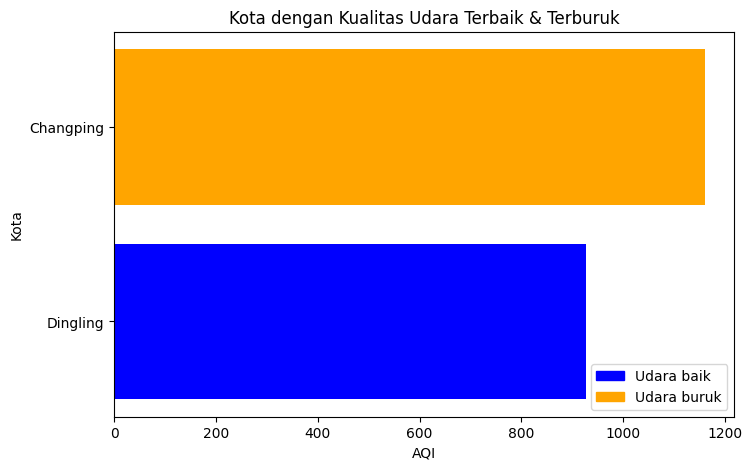

In [30]:
# Data untuk plot
kota = [best_city["station"], worst_city["station"]]
aqi_values = [best_city["AQI"], worst_city["AQI"]]

# Set Biru = terbaik, Oranye = terburuk
colors = ["blue", "orange"]

# Plot kota terbaik dan terburuk kualitas udaranya
plt.figure(figsize=(8, 5))
plt.barh(kota, aqi_values, color=colors)
plt.ylabel("Kota")
plt.xlabel("AQI")
plt.title("Kota dengan Kualitas Udara Terbaik & Terburuk")
blue_patch = mpatches.Patch(color="blue", label="Udara baik")
orange_patch = mpatches.Patch(color="orange", label="Udara buruk")
plt.legend(handles=[blue_patch, orange_patch], loc="lower right")
plt.show()

### Pertanyaan 2: Polutan apa yang paling dominan di kota Changping dan Dongling?

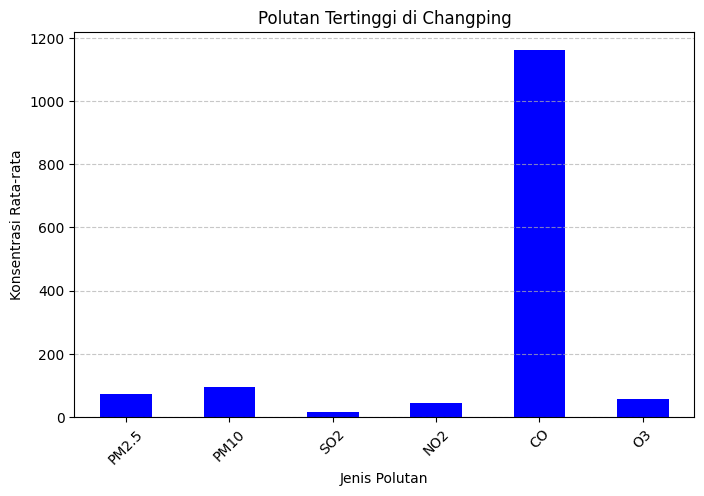

In [31]:
# Visualisasi Polutan tertinggi atau sering muncul di kota Changping
plt.figure(figsize=(8, 5))
changping_pollutants.plot(kind="bar", color="blue")
plt.xlabel("Jenis Polutan")
plt.ylabel("Konsentrasi Rata-rata")
plt.title("Polutan Tertinggi di Changping")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


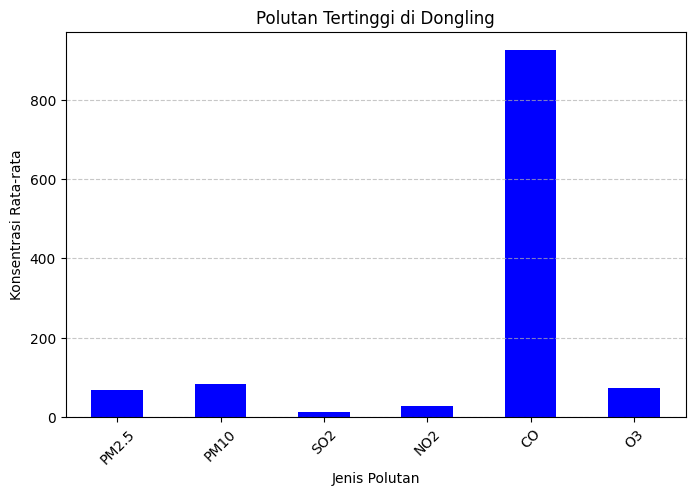

In [32]:
# Visualisasi Polutan tertinggi atau sering muncul di kota Dongling
plt.figure(figsize=(8, 5))
dongling_pollutants.plot(kind="bar", color="blue")
plt.xlabel("Jenis Polutan")
plt.ylabel("Konsentrasi Rata-rata")
plt.title("Polutan Tertinggi di Dongling")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

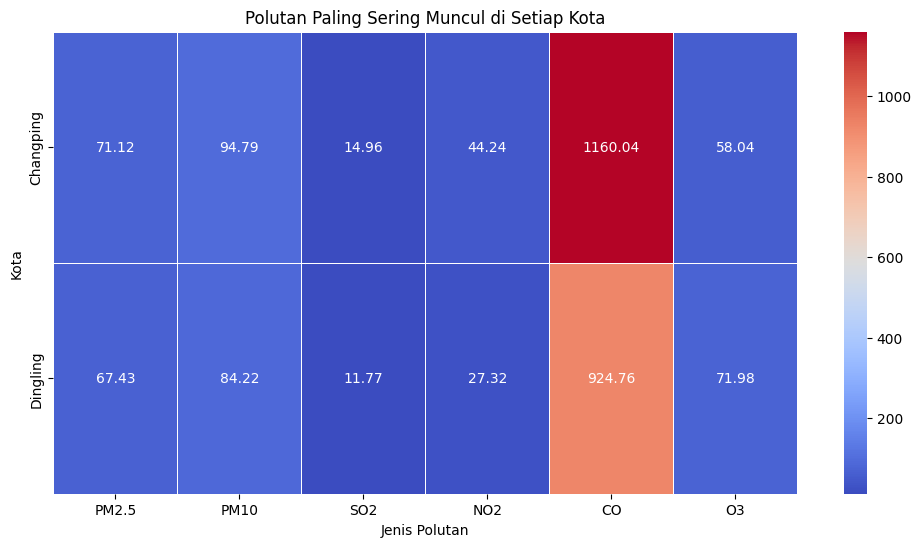

In [33]:
# Visualisasi distribusi polutan tiap kota
plt.figure(figsize=(12, 6))
sns.heatmap(total_polutan, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Polutan Paling Sering Muncul di Setiap Kota")
plt.xlabel("Jenis Polutan")
plt.ylabel("Kota")
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

#### Conclution pertanyaan 1 Kota mana yang memiliki kualitas udara terbaik dan terburuk berdasarkan data yang tersedia?

Berdasarkan hasil analisa dan juga visualisasi grafik, kota Dingling memiliki kualitas udara terbaik dengan nilai AQI yang lebih rendah, menunjukkan udara yang lebih bersih dan sehat untuk dihuni. Sebaliknya kota Changping memiliki kualitas udara terburuk dengan nilai AQI yang lebih tinggi yang mengindikasikan tingkat polusi yang lebih tinggi karena jumlah polutanya banyak. Perbedaan ini menunjukkan bahwa faktor banyaknya polutan itu mempengaruhi kulitas udara kota.

#### Conclution pertanyaan 2 Polutan apa yang paling dominan di kota Changping dan Dongling?

Berdasarkan analisis data dan juga visualisasi grafik, polutan yang paling dominan di Changping adalah CO (Karbon Monoksida) dengan konsentrasi tertinggi sebesar 1160.04. Sementara itu, di Dingling polutan yang paling dominan juga adalah CO (Karbon Monoksida) dengan konsentrasi 924.76. Hal ini menunjukkan bahwa CO merupakan polutan yang paling banyak ditemukan di kedua kota tersebut.

In [34]:
air_quality.to_csv("main_data.csv", index=False)

In [33]:
air_quality.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,300.0
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,300.0
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,400.0
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,300.0
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,300.0
